In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import nbimporter


In [2]:
df = pd.read_csv("linear_reg.csv")
df.info()
X= df["X"]
y = df["Y"]
X,y = X.to_numpy()[:-2],y.to_numpy()[:-2]
# last 2 is noise
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

<Axes: >

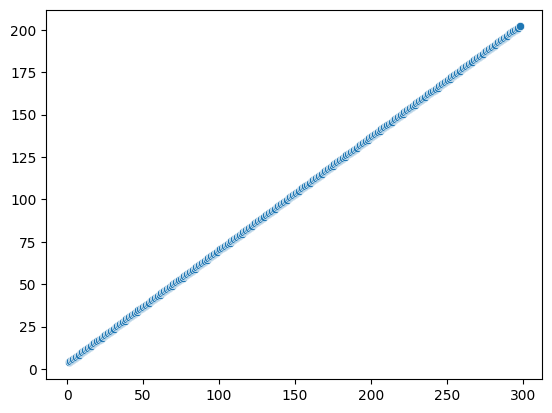

In [3]:
sns.scatterplot(x=X, y=y)

In [4]:
from compute_gradient_descent_one_feature import compute_gradient_descent_one_feature
from compute_gradient_one_feat import compute_gradient_one_feature_vec
from cost_one_feature import compute_cost_one_feature_vec

In [5]:
w_fin, b_in, J_hist, w_hist = compute_gradient_descent_one_feature(X,y,0,0,1e-05,100000,compute_cost_one_feature_vec,compute_gradient_one_feature_vec)

 iteration 0. cost 3424.2607785787427, w = 0.203153888901884, b= 0.0010288888889510067
 iteration 10001. cost 1.226021905408489, w = 0.6824441818744663, b= 0.08252295512229198
 iteration 20002. cost 1.166516760555797, w = 0.6820565378304191, b= 0.15966347492724905
 iteration 30003. cost 1.109899706240735, w = 0.6816784179670418, b= 0.23490869862516986
 iteration 40004. cost 1.0560305685846636, w = 0.6813095882809523, b= 0.3083051924997955
 iteration 50005. cost 1.0047759770677556, w = 0.6809498205180903, b= 0.37989837872932536
 iteration 60006. cost 0.9560090343270388, w = 0.6805988920324604, b= 0.44973256349640167
 iteration 70007. cost 0.9096090019808294, w = 0.6802565856483455, b= 0.5178509644074494
 iteration 80008. cost 0.8654610017017134, w = 0.6799226895259044, b= 0.5842957372383278
 iteration 90009. cost 0.8234557307979583, w = 0.6795969970300738, b= 0.649108002022878


In [6]:
from compute_one_feature_ import compute_prediction_one_feature_vec
predictions = compute_prediction_one_feature_vec(X,w_fin,b_in)
lm = LinearRegression()

lm.fit(X.reshape(-1,1),y)
lm_predictions = lm.predict(X.reshape(-1,1))
lm.coef_



array([0.66666667])

Text(0, 0.5, 'actual_values')

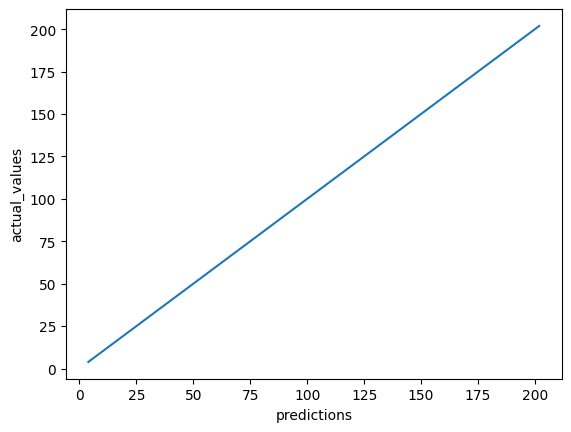

In [7]:
plt.plot(y,lm_predictions)
plt.xlabel("predictions")
plt.ylabel("actual_values")

Text(0, 0.5, 'actual_values')

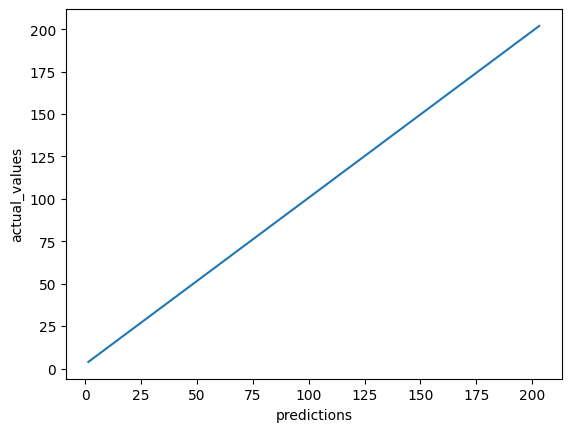

In [8]:
plt.plot(predictions,y)
plt.xlabel("predictions")
plt.ylabel("actual_values")

Text(0.5, 1.0, 'Cost vs Iterations')

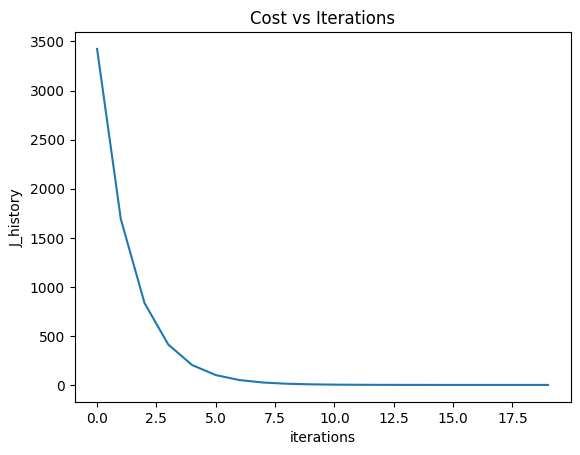

In [14]:
plt.plot(np.arange(20),J_hist[:20])
plt.xlabel("iterations")
plt.ylabel("J_history")
plt.title("Cost vs Iterations")

In [15]:
residuals = y - predictions


Text(0.5, 1.0, 'Residuals vs Predicted')

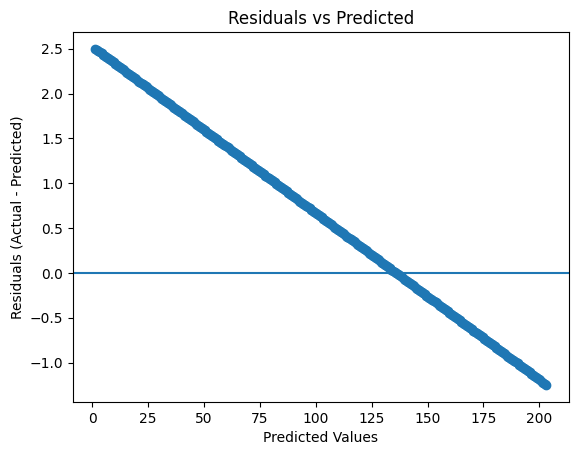

In [18]:
plt.figure()
plt.scatter(predictions, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")

(array([30., 30., 30., 29., 30., 30., 29., 30., 30., 30.]),
 array([-1.2487065 , -0.87410085, -0.49949519, -0.12488954,  0.24971612,
         0.62432177,  0.99892743,  1.37353308,  1.74813873,  2.12274439,
         2.49735004]),
 <BarContainer object of 10 artists>)

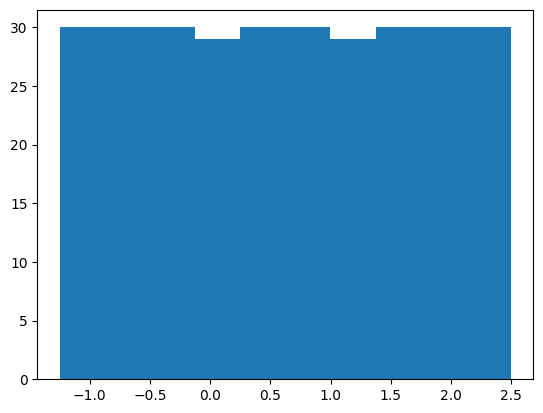

In [19]:
plt.hist(residuals)